# PROBLEM SET 2

### Computational Methods in Economics

### Marcelo Alonso

##### AI USE: Eu utilizei o ChatGPT para me auxiliar na **organização e otimização do código**, no **reconhecimento da sintaxe das funções do Julia** e na **correção ortográfica/concordância** das minhas respostas. 


In [ ]:
using Pkg

# 1) Ativa o ambiente local do projeto usando o diretório onde o script está salvo (relative path)
Pkg.activate(@__DIR__)

# 2) Resolve as dependências do ambiente (confere se as versões dos pacotes são compatíveis)
Pkg.resolve()

# 3) Instancia o ambiente, instalando os pacotes conforme definido nos arquivos Project.toml e Manifest.toml
Pkg.instantiate()

# 4) Define a lista dos pacotes necessários para o projeto
packages = [
    "Plots",
    "Interpolations",
    "DataFrames",
    "DataInterpolations",
    "Random",
    "Distributions",
    "BenchmarkTools",
    "Roots",
    "Optim",
    "NLopt",
    "OptimizationNLopt",
    "JuMP",
    "Ipopt"
]

# 5) Adiciona os pacotes da lista, instalando-os se ainda não estiverem presentes
Pkg.add(packages)


# QUESTION 1

### a) Bracket the root.

### RESPOSTA DO ITEM A: 
 

#### Encontramos o intervalo de [0,9]

In [ ]:

# 1) Definir a função
f(x) = x^3 - 14x^2 + 55x - 10

# 2) Função para Bracketing - Tenta encontrar um intervalo [a, b] tal que f(a)*f(b) < 0
function bracket_root(f, a, b; step=1, max_iter=500)

    
    # 3) Verifica se já existe mudança de sinal
    if f(a)*f(b) < 0
        return a, b
    end
    
    # 4) Se não há mudança de sinal, expandimos o intervalo
    for i in 1:max_iter
        a -= step   # move a para a esquerda
        if f(a)*f(b) < 0
            return a, b
        end
        
        b += step   # move b para a direita
        if f(a)*f(b) < 0
            return a, b
        end
    end
    
    error("Não foi possível encontrar um intervalo [a, b] com mudança de sinal após $max_iter tentativas.")
end

# Números fornecidos pelo exercício

a0, b0 = 4, 6
a_bracket, b_bracket = bracket_root(f, a0, b0)

println("Intervalo encontrado: [$(a_bracket), $(b_bracket)]")
println("f(a) = ", f(a_bracket), ", f(b) = ", f(b_bracket))
println("Verificação de mudança de sinal: f(a)*f(b) = ", f(a_bracket)*f(b_bracket))


Intervalo encontrado: [0, 9]
f(a) = -10, f(b) = 80
Verificação de mudança de sinal: f(a)*f(b) = -800


### b) Find the root using the bisection method. How many iterations are required to reach the tolerance of $10^{-8}$?

### RESPOSTA DO ITEM B: 


 

#### A raíz aproximada da função, dentro do intervalo de tolerância, é 0.19097520550712943. Foram necessárias 30 iterações para atingir a tolerância de $10^{-8}$.

In [49]:
#Código baseado nos slides de aula

function bisection(f, a, b; tol=1e-8, max_iter=500)
    # 1) Verificar se o intervalo inicial [a, b] é válido
    if f(a) * f(b) > 0
        error("f(a)*f(b) > 0. O intervalo [a, b] não 'bracketa' a raiz.")
    end
    
    # Inicializa o contador de iterações
    iter = 0
    
    # Para referência, o comprimento inicial do intervalo
    length_initial = abs(b - a)
    
    # Repetir enquanto o intervalo for maior que tol e não excedermos o max_iter
    while (abs(b - a) > tol) && (iter < max_iter)
        iter += 1
        
        # 2) Em cada iteração, calcula o ponto médio 
        c = (a + b) / 2
        
        # 3) Verifica se f(c) está suficientemente perto de 0 e o retorna caso sim
        if abs(f(c)) < tol
            return c, iter
        end
        
        # 4) Decide em qual subintervalo a raiz está
        if f(a)*f(c) < 0
            b = c  # raiz em [a, c]
        else
            a = c  # raiz em [c, b]
        end
    end
    
    # Se chegou aqui, pode ser que não tenha convergido ou convergiu "no limite" de iterações
    if iter == max_iter
        error("O método da bisseção não convergiu em $max_iter iterações.")
    else
        # Retornamos o ponto médio como aproximação
        c = (a + b) / 2
        return c, iter
    end
end


# Definindo a função f(x) novamente só pra garantir
f(x) = x^3 - 14x^2 + 55x - 10

# Vamos usar o intervalo que econtramos no item a 
a, b = 0, 9  

# Calcula a raiz e o número de iterações
raiz, n_iter = bisection(f, a, b; tol=1e-8, max_iter=100)

println("Raiz aproximada: $raiz")
println("Iterações utilizadas: $n_iter")


# Cálculo teórico do número de iterações
length_initial = abs(b - a)  # tamanho inicial do intervalo
tol = 1e-8
n_teorico = ceil(log2(length_initial / tol))
println("Número teórico mínimo de iterações ≈ $n_teorico")


Raiz aproximada: 0.19097520550712943
Iterações utilizadas: 30
Número teórico mínimo de iterações ≈ 30.0


### c) Now use the secant method. How does it compare?

### RESPOSTA DO ITEM C:

 #### No nosso caso, o método da bisseção convergiu em **30 iterações**, enquanto o método da secante levou apenas **9 iterações**. Isso ocorre porque a bisseção possui **convergência linear**, reduzindo o tamanho do intervalo pela metade a cada iteração, enquanto o método da secante apresenta **convergência superlinear**, atualizando as estimativas com base na inclinação da reta secante entre os dois pontos mais atualizados. 
 
 #### Além disso, o método da bissecção exige dois pontos, **a** e **b**, em que a função tenha sinais opostos, garantindo a existência de uma raiz no intervalo. Já no método da secante, os dois pontos não precisam ter sinais opostos, mas não podem ser muito próximos, pois isso pode gerar um denominador quase nulo e comprometer a estabilidade do cálculo. 


In [58]:
#Código baseado nos slides de aula

function secant(f, a, b; tol=1e-8, max_iter=500)
    # Inicializa o contador de iterações
    iter = 0
    
    # Avalia a função nos palpites iniciais
    fa = f(a)
    fb = f(b)
    
    while iter < max_iter
        # Se f(b) já é suficientemente pequeno, retorna b como raiz
        if abs(fb) < tol
            return b, iter
        end
        
        # Evita divisão por zero
        if (fb - fa) == 0
            error("Divisão por zero: f(b) - f(a) == 0")
        end
        
        # Calcula o próximo palpite usando a fórmula da secante
        c = b - fb * (b - a) / (fb - fa)
        
        # Verifica se a mudança é menor que a tolerância
        if abs(c - b) < tol
            return c, iter + 1
        end
        
        # Atualiza os palpites para a próxima iteração
        a, fa = b, fb
        b, fb = c, f(c)
        
        iter += 1
    end
    
    error("O método da secante não convergiu em $max_iter iterações.")
end

# Definindo a função f(x)
f(x) = x^3 - 14x^2 + 55x - 10

# Seleciona os palpites iniciais (escolhidos para que haja variação em f)
a, b = 0, 9

# Calcula a raiz e o número de iterações usando o método da secante
raiz, n_iter = secant(f, a, b; tol=1e-8, max_iter=500)

println("Raiz aproximada: $raiz")
println("Iterações utilizadas: $n_iter")


Raiz aproximada: 0.19097520444614993
Iterações utilizadas: 9


### d) Since this is a polynomial, we can easily compute its derivative and use the Newton-Raphson method. How does it compare to the other methods?

### RESPOSTA DO ITEM D:

#### Embora o método de Newton-Raphson possa convergir muito rapidamente com um palpite inicial ideal (por exemplo, 3 iterações com $x_0=0$), sua eficiência depende fortemente da escolha desse palpite. Um valor inicial mal escolhido pode resultar em um número significativamente maior de iterações, como 35 com $x_0=10$. 

#### Além disso, ao contrário dos métodos da bisseção e da secante, o Newton-Raphson exige o cálculo explícito da derivada $f'(x)$, o que pode ser um problema caso a derivada não exista ou seja difícil de computar. A convergência do método também está ligada ao comportamento dessa derivada, podendo causar oscilações ou lentidão se for muito pequena ou variar abruptamente na região escolhida.



In [73]:
#Código baseado nos slides de aula

function newton_raphson(f, df, x0; tol=1e-8, max_iter=100)
    iter = 0
    x = x0
    while iter < max_iter
        fx = f(x)
        if abs(fx) < tol
            return x, iter
        end
        dfx = df(x)
        if abs(dfx) < tol
            error("Derivada muito próxima de zero; método não pode continuar.")
        end
        x = x - fx/dfx
        iter += 1
    end
    error("Newton-Raphson não convergiu em $max_iter iterações.")
end

# Definindo a função e sua derivada
f(x) = x^3 - 14*x^2 + 55*x - 10
df(x) = 3*x^2 - 28*x + 55

# Palpite inicial (escolha próximo da raiz)
x0 = 0

# Calcula a raiz e o número de iterações
raiz, n_iter = newton_raphson(f, df, x0; tol=1e-8, max_iter=100)

println("Raiz aproximada: $raiz")
println("Iterações utilizadas: $n_iter")


Raiz aproximada: 0.1909752043048871
Iterações utilizadas: 3


# QUESTION 2

### a) Choose 3 optimization methods and optimize this function using relative, absolute tolerance for f(x) and x of $10{^{−4}}$. If the method requires a starting point, use 0.

### RESPOSTA DO ITEM A:

#### ABAIXO IMPLEMENTAMOS 3 MÉTODOS GLOBAIS E 2 MÉTODOS LOCAIS.

#### Note que o gráfico abaixo mostra que a função oscila entre valores negativos e positivos ao longo do intervalo entre 0 e 10 no eixo X. Essa característica sugere a presença de múltiplos mínimos locais, dificultando a busca pelo mínimo global da função. Para contornar o problema podemos utilizar métodos de Global Optimization.

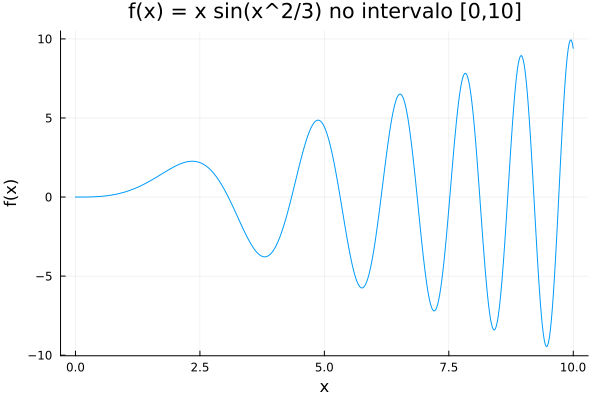

In [100]:
using Plots

# Definição da função
f(x) = x * sin(x^2 / 3)

# Gera pontos no intervalo [0,10] para plotar
xvals = range(0, 10, length=500)
yvals = [f(x) for x in xvals]

# Plota f(x)
plot(xvals, yvals,
     title = "f(x) = x sin(x^2/3) no intervalo [0,10]",
     xlabel = "x",
     ylabel = "f(x)",
     legend = false,
     size = (600, 400)
)
#savefig("grafico_fx.png")  # Salva o gráfico em um arquivo




#### Abaixo testamos 3 métodos de Global Optimization: i) DIRECT; ii) Controlled Random Search (CRS); iii) Multi-Level Single-Linkage (MLSL). Os 3 métodos encontraram um $x$ próximo de 9.46 que minimiza a função no inntervalo entre 0 e 10.

In [563]:
using NLopt
using Printf

# 1) Define a função alvo e a assinatura para NLopt (vetor, grad)
function myfun(x::Vector, grad::Vector)
    f = x[1] * sin(x[1]^2 / 3)
    
    return f
end

# 2) Cria uma função auxiliar para rodar cada método global do NLopt
function run_global_method(method_symbol::Symbol; tol=1e-4)
    # Cria o otimizador 1D
    opt = Opt(method_symbol, 1)

    # Define limites [0, 10]
    lower_bounds!(opt, [0.0])
    upper_bounds!(opt, [10.0])

    # Define a função objetivo
    min_objective!(opt, myfun)

    # Ajusta tolerâncias
    ftol_abs!(opt, tol)
    ftol_rel!(opt, tol)
    xtol_abs!(opt, tol)
    xtol_rel!(opt, tol)

    # Limite de avaliações
    maxeval!(opt, 10000)

    # Chute inicial (se for usado internamente, depende do método)
    x0 = [0.0]

    # Executa a otimização
    (minf, minx_vec, ret) = optimize!(opt, x0)
    return (minx_vec[1], minf, ret)
end

# 3) Lista de métodos globais que permitem definir tolerâncias
global_methods = [
    :GN_DIRECT,      # DIRECT
    :GN_CRS2_LM,     # Controlled Random Search
    :GN_MLSL         # Multi-Level Single-Linkage
]

# 4) Executa cada método com tolerância 1e-4 e imprime resultados
for method in global_methods
    @printf("\n=== Método: %s  (tol = 1e-4) ===\n", string(method))
    x_opt, f_opt, ret_code = run_global_method(method, tol=1e-4)
    println("Código de retorno = ", ret_code)
    println("x ótimo encontrado = ", x_opt)
    println("f(x) mínimo = ", f_opt)
end



=== Método: GN_DIRECT  (tol = 1e-4) ===
Código de retorno = FTOL_REACHED
x ótimo encontrado = 9.464258497180309
f(x) mínimo = -9.463546524147459

=== Método: GN_CRS2_LM  (tol = 1e-4) ===
Código de retorno = FTOL_REACHED
x ótimo encontrado = 7.205163037671399
f(x) mínimo = -7.202721856100495

=== Método: GN_MLSL  (tol = 1e-4) ===
Código de retorno = MAXEVAL_REACHED
x ótimo encontrado = 9.464970196635445
f(x) mínimo = -9.463641402389884


### b) How does your answer depend on the starting point? And on the algorithm?

### RESPOSTA DO ITEM B: 

#### Os métodos de busca global, nesse caso, não dependem tanto do starting point, de modo que sempre chegam em algo próximo de $x=9.46$.

#### Para complementar a resposta, testo algoritmos Locais abaixo e mostro como eles podem ser sensíveis ao starting point e ao intervalo de busca. Para começar, implementamos o método de Brent. Repare que ele não consegue escapar do mínimo local encontrado em $x=3.8$.



In [564]:
using Optim

# Definimos a função f(x) = x * sin(x^2 / 3) a ser minimizada no intervalo [0,10].
f(x) = x * sin(x^2 / 3)


# Ajustamos tolerâncias absoluta e relativa para x e f(x) em 1e-4.
res = optimize(
    f,            
    0.0, 10.0,    
    Brent();      # Método de otimização (Brent)
    rel_tol = 1e-4,
    abs_tol = 1e-4
)

# Exibimos os resultados
println("Resultado da otimização com método Brent:")
println("Mínimo encontrado em x = ", Optim.minimizer(res))
println("Valor de f(x) no mínimo = ", Optim.minimum(res))


Resultado da otimização com método Brent:
Mínimo encontrado em x = 3.801182889672114
Valor de f(x) no mínimo = -3.7806677032852263


#### Podemos melhorar o desempenho do método de Brent ao explorar múltiplos subintervalos, identificando um mínimo local para cada um deles. Ao final, escolhemos entre esses mínimos o ponto que gera o menor valor global da função. Com isso, encontramos x = 9.46 que é de fato o x que mais aproxima a função do mínimo no intervalo [0,10].

In [265]:
using Optim

f(x) = x * sin(x^2 / 3)

intervals = [
    (0.0, 2.0),
    (2.0, 4.0),
    (4.0, 6.0),
    (6.0, 8.0),
    (8.0, 10.0)
]

resultados = []

for (a, b) in intervals
    res_local = optimize(f, a, b, Brent(); rel_tol=1e-4, abs_tol=1e-4)
    push!(resultados, (Optim.minimizer(res_local), Optim.minimum(res_local)))
end

# Constrói um vetor só com os valores de f(x) nos mínimos locais
vals = [r[2] for r in resultados]

# argmin(vals) devolve o índice (inteiro) do menor valor em vals
melhor_idx = argmin(vals)

x_min, f_min = resultados[melhor_idx]

println("Mínimos de cada subintervalo:")
println(vals)
println("Melhor mínimo entre subintervalos:")
println("x = $x_min, f(x) = $f_min")


Mínimos de cada subintervalo:
[4.648868157813977e-13, -3.780668162184542, -5.749318485237072, -7.202750862244144, -9.463620501087656]
Melhor mínimo entre subintervalos:
x = 9.464634937977706, f(x) = -9.463620501087656


#### Agora partimos para outro método: o Nelder-Mead. Ao contrário do Brent, que exige apenas o intervalo inicial, o método Nelder-Mead exige um chute inicial para começar a busca. Note que, com um chute inicial de $x=0$, o método encontra um mínimo local na borda do intervalo, mas com um chute de $x=7$ encontra o mínimo global.

In [565]:
using NLopt
using Printf

# Definindo a função para NLopt
function myfun(x::Vector, grad::Vector)
    return x[1] * sin(x[1]^2 / 3)
end

# Criando uma função para rodar o método com diferentes chutes iniciais
function run_nelder_mead(x0)
    # Método Nelder–Mead
    opt = Opt(:LN_NELDERMEAD, 1)

    # Definindo limites inferiores e superiores: [0, 10]
    lower_bounds!(opt, [0.0])
    upper_bounds!(opt, [10.0])

    # Definindo a função objetivo para minimização
    min_objective!(opt, myfun)

    # Ajustando tolerâncias
    ftol_abs!(opt, 1e-4)  # tolerância absoluta em f(x)
    ftol_rel!(opt, 1e-4)  # tolerância relativa em f(x)
    xtol_abs!(opt, 1e-4)  # tolerância absoluta em x
    xtol_rel!(opt, 1e-4)  # tolerância relativa em x

    # Definir limite de iterações
    maxeval!(opt, 1000)

    # Executar otimização com o chute inicial fornecido
    (minf, minx, ret) = optimize!(opt, [x0])

    return (x0, minx[1], minf, ret)
end

# Lista de chutes iniciais
initial_guesses = [0.0, 7.0]

# Executando para cada chute inicial e mostrando os resultados
for x0 in initial_guesses
    x_init, x_opt, f_opt, ret_code = run_nelder_mead(x0)
    @printf("\nChute inicial: %g\n", x_init)
    @printf("Código de retorno: %s\n", string(ret_code))
    @printf("x ótimo encontrado: %g\n", x_opt)
    @printf("f(x) mínimo: %g\n", f_opt)
end



Chute inicial: 0
Código de retorno: XTOL_REACHED
x ótimo encontrado: 0
f(x) mínimo: 0

Chute inicial: 7
Código de retorno: FTOL_REACHED
x ótimo encontrado: 9.46582
f(x) mínimo: -9.4635


### c) What happens if we change the tolerance to $10^{-8}$?

### RESPOSTA DO TEM C:

#### Utilizando o Nelder-Mead como exemplo, note que reduzir a tolerância, dado um initial guess de $x=2.72366$, obtemos resultados diferentes. Enquanto com $10^{-4}$ chegamos em $x$ ótimo $= 2.72366, f(x) = 1.68883$, com $10^{-8}$ chegamos em $x$ ótimo $= 0, f(x) = 0$. Note que nesse exemplo a tolerância menor encontra um mínimo local, enquanto a tolerância maior não alcança nem isso. Em resumo, reduzir a tolerância ajuda a encontrar resultados mais precisos se o método utilizado for adequado para o seu problema.

In [566]:
using NLopt
using Printf

# Função objetivo: f(x) = x * sin(x²/3)
function myfun(x::Vector, grad::Vector)
    # Como NLopt sempre trabalha com vetores, usamos x[1] para o único elemento.
    return x[1] * sin(x[1]^2 / 3)
end

# Função auxiliar que executa o método local (Nelder–Mead) com um dado chute inicial e tolerância
function run_local_method(initial_guess::Float64, tol::Float64)
    opt = Opt(:LN_NELDERMEAD, 1)   # Método local sem derivadas
    # Define os limites do domínio [0,10]
    lower_bounds!(opt, [0.0])
    upper_bounds!(opt, [10.0])
    
    # Define a função objetivo
    min_objective!(opt, myfun)
    
    # Ajusta as tolerâncias (absolutas e relativas para f(x) e x)
    ftol_abs!(opt, tol)
    ftol_rel!(opt, tol)
    xtol_abs!(opt, tol)
    xtol_rel!(opt, tol)
    
    # Limite máximo de avaliações
    maxeval!(opt, 1000)
    
    # Chute inicial fornecido como vetor
    (minf, minx, ret) = optimize!(opt, [initial_guess])
    return (minx[1], minf, ret)
end

# Lista de chutes iniciais a testar
initial_guesses = [2.72366]
# Tolerâncias a testar
tolerances = [1e-4, 1e-8]

# Loop que roda o método para cada combinação de chute inicial e tolerância
for x0 in initial_guesses
    @printf("\nChute inicial: %g\n", x0)
    for tol in tolerances
        x_opt, f_opt, ret_code = run_local_method(x0, tol)
        @printf("Tol = %g: x ótimo = %g, f(x) = %g, código de retorno = %s\n", tol, x_opt, f_opt, string(ret_code))
    end
end



Chute inicial: 2.72366
Tol = 0.0001: x ótimo = 2.72366, f(x) = 1.68883, código de retorno = FTOL_REACHED
Tol = 1e-08: x ótimo = 0, f(x) = 0, código de retorno = XTOL_REACHED


# QUESTION 3

### a) Create a function g(θ) that for each value of teta, it computes the sum of the quadratic difference between the function for that θ and the four known points.

### RESPOSTA DO ITEM A:

In [645]:
using Optim

# Definição da função f(x1, x2; θ):
# θ será um vetor ou tupla de 4 parâmetros: (θ1, θ2, θ3, teta4).
function f(x1, x2, teta)
    teta1, teta2, teta3, teta4 = teta
    return teta1*x1 + teta2/(1 + exp(-teta3*x2)) + teta4*(x1^x2)
end

# Definição da função g(teta):
function g(teta)
    # Valores observados (y1, y2, y3, y4)
    ys = [35.8, 547.6, 32.2, 14.5]
    
    # Pontos (x1, x2) correspondentes
    Xs = [(1.0,1.0), (2.0,4.0), (-1.0,2.0), (2.0,-2.0)]
    
    # Calcula a soma dos quadrados das diferenças
    soma = 0.0
    for i in 1:4
        x1, x2 = Xs[i]
        yi = ys[i]
        soma += (f(x1, x2, teta) - yi)^2
    end
    return soma
end




g (generic function with 1 method)

### b) What is the value of g($θ_1$), when $θ_1$ = (0, 0, 0, 0)?

### RESPOSTA DO ITEM B: 

#### O valor de g($θ_1$) quando $θ_1$ = (0, 0, 0, 0) é 302394.49000000005.

In [646]:
# Definindo θ = (0, 0, 0, 0)
teta_inicial = [0.0, 0.0, 0.0, 0.0]

println(g(teta_inicial))



302394.49000000005


### c) Get your best estimate of $θ_0$ minimizing the function g(θ). You can choose your preferred algorithm.

### RESPOSTA DO ITEM C:

#### O $θ$ ótimo encontrado foi: [1.7999999994495945, 2.4000000010825646, -21.118262126747762, 34.00000000005105]


In [647]:
using Optim

# Configuração dos critérios de parada para BFGS
options_bfgs = Optim.Options(
    f_tol = 1e-16,  
    x_tol = 1e-16,  
    iterations = 100000  
)

# Otimização com BFGS
resultado_bfgs = optimize(g, teta_inicial, BFGS(), options_bfgs)


teta_otimo_bfgs = Optim.minimizer(resultado_bfgs)
println("θ ótimo (BFGS) = ", teta_otimo_bfgs)
println("Valor mínimo de g(θ) (BFGS) = ", Optim.minimum(resultado_bfgs))


θ ótimo (BFGS) = [1.7999999994495945, 2.4000000010825646, -21.118262126747762, 34.00000000005105]
Valor mínimo de g(θ) (BFGS) = 1.6911982886909207e-18


### d) For each iteration $i$, record the trying point ($θ_i$) and the value g($θ_i$). Plot in a graph the value of the iteration and g($θ_i$). Plot in 4 different graphs the iteration $i$ and the trying point $θ_i$.

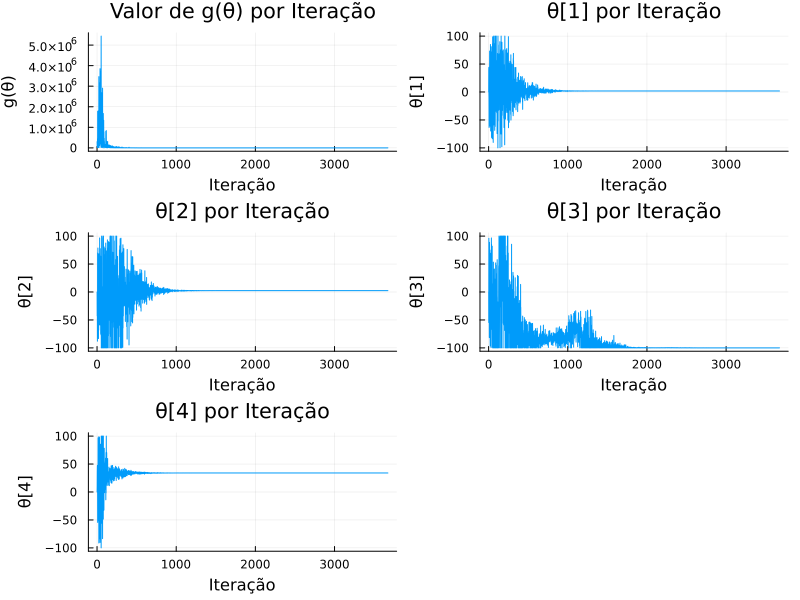

Código de retorno (NLopt) = FTOL_REACHED
θ ótimo (NLopt)          = [1.8000000097608255, 2.3999999759339175, -100.0, 33.999999998627146]
Valor mínimo g(θ) (NLopt) = 2.24179277732438e-16


In [648]:
# Vetores para armazenar valores de θ e g(θ) a cada iteração
teta_trace = Vector{Vector{Float64}}()
g_trace = Float64[]

function myfun(teta::Vector{Float64}, grad::Vector{Float64})
    # Não calculamos gradiente manualmente neste exemplo
    if length(grad) > 0
        fill!(grad, 0.0)
    end
    # Avalia g(θ)
    g_val = g(teta)
    # Armazena o ponto atual e o valor de g(θ)
    push!(teta_trace, copy(teta))
    push!(g_trace, g_val)
    return g_val
end

# Configura o otimizador
opt = Opt(:GN_CRS2_LM, 4)  # método global CRS2
NLopt.srand(123)          # semente para reprodutibilidade

lower_bounds!(opt, [-1e2, -1e2, -1e2, -1e2])
upper_bounds!(opt, [1e2, 1e2, 1e2, 1e2])
min_objective!(opt, myfun)

# Critérios de parada
ftol_abs!(opt, 1e-16)
ftol_rel!(opt, 1e-16)
xtol_abs!(opt, 1e-16)
xtol_rel!(opt, 1e-16)
maxeval!(opt, 100000)

# Chute inicial
x0 = [0.0, 0.0, 0.0, 0.0]

# Executa a otimização
(minf, minx, ret) = optimize!(opt, x0)
println("Código de retorno (NLopt) = ", ret)
println("θ ótimo (NLopt)          = ", minx)
println("Valor mínimo g(θ) (NLopt) = ", minf)

# Converte θ_trace em matriz para plotar cada componente
teta_matrix = hcat(teta_trace...)  # cada coluna é um θ em uma iteração

# Plots
plot_g  = plot(g_trace, title="Valor de g(θ) por Iteração", 
               xlabel="Iteração", ylabel="g(θ)", legend=false)
plot_teta1 = plot(teta_matrix[1, :], title="θ[1] por Iteração", 
               xlabel="Iteração", ylabel="θ[1]", legend=false)
plot_teta2 = plot(teta_matrix[2, :], title="θ[2] por Iteração", 
               xlabel="Iteração", ylabel="θ[2]", legend=false)
plot_teta3 = plot(teta_matrix[3, :], title="θ[3] por Iteração", 
               xlabel="Iteração", ylabel="θ[3]", legend=false)
plot_teta4 = plot(teta_matrix[4, :], title="θ[4] por Iteração", 
               xlabel="Iteração", ylabel="θ[4]", legend=false)

plot_grid = plot(plot_g, plot_teta1, plot_teta2, plot_teta3, plot_teta4, 
                 layout=(3,2), size=(800, 600))
display(plot_grid)


### e) What is your estimate $\hat{\theta}$? How many iterations were necessary?

### RESPOSTA DO ITEM E:

#### O número de iterações vai depender do método utilizado. Encontramos 3674 para o CRS e 41 para o BFGS. O $\hat{\theta}$ é [1.7999999994495945, 2.4000000010825646, -21.118262126747762, 34.00000000005105].

In [649]:
println("\n============================")

println("Usando CRS (item D):")
println("  • Estimativa final de θ = ", minx)
println("  • Número de iterações   = ", length(g_trace))

println("\nUsando BFGS (item C):")
println("  • Estimativa final de θ = ", teta_otimo_bfgs)
println("  • Número de iterações   = ", Optim.iterations(resultado_bfgs))
println("  • Valor mínimo g(θ)     = ", Optim.minimum(resultado_bfgs))


Usando CRS (item D):
  • Estimativa final de θ = [1.8000000097608255, 2.3999999759339175, -100.0, 33.999999998627146]
  • Número de iterações   = 3674

Usando BFGS (item C):
  • Estimativa final de θ = [1.7999999994495945, 2.4000000010825646, -21.118262126747762, 34.00000000005105]
  • Número de iterações   = 41
  • Valor mínimo g(θ)     = 1.6911982886909207e-18


# QUESTION 4

### a) Create a function that has inputs the vectors: $\lambda = (\lambda_1, \dots, \lambda_N)$, $e = (e^{1}_{1}, \dots, e^{1}_{K}, \dots, e^{N}_{1}, \dots, e^{N}_{K})$, $\alpha = (\alpha^{1}_{1}, \dots, \alpha^{1}_{K}, \dots, \alpha^{N}_{1}, \dots, \alpha^{N}_{K})$, $\sigma = (\sigma^{1}_{1}, \dots, \sigma^{1}_{K}, \dots, \sigma^{N}_{1}, \dots, \sigma^{N}_{K})$ respecting the imposed constraints. The function should give the optimal allocation $ x = (x^{1}_{1}, \dots, x^{1}_{K}, \dots, x^{N}_{1}, \dots, x^{N}_{K}) $. You can choose your optimization algorithm.

### RESPOSTA DO ITEM A:



In [651]:
using JuMP
using Ipopt

function solve_pareto(pesos, preferencias, dotacoes, aversao)
    # Número de indivíduos (N) e de bens (K)
    N = length(pesos)          
    K = size(preferencias, 2)         

    # Conferência das dimensões
    @assert size(preferencias, 1) == N "A matriz de preferências deve ter dimensão N×K"
    @assert size(dotacoes, 1) == N "A matriz de dotações deve ter dimensão N×K"
    @assert size(dotacoes, 2) == K "A matriz de dotações deve ter dimensão N×K"
    @assert size(aversao, 1) == N "A matriz de aversão deve ter dimensão N×K"
    @assert size(aversao, 2) == K "A matriz de aversão deve ter dimensão N×K"

    # Cria o modelo de otimização com o solver Ipopt
    model = Model(Ipopt.Optimizer)

    # Declaração das variáveis de decisão: x[i,k] ≥ 0
    @variable(model, x[1:N, 1:K] >= 0)
    
    # Restrições de recursos:
    # para cada bem k, a soma das alocações não pode ultrapassar a soma das dotações
    for k in 1:K
        @constraint(model, sum(x[i, k] for i in 1:N) <= sum(dotacoes[i, k] for i in 1:N))
    end

    # Função objetivo:
    # maximizar Σᵢ pesos[i] * Σₖ [ preferencias[i,k] * (x[i,k])^(1 - aversao[i,k]) / (1 - aversao[i,k]) ]
    @objective(model, Max, sum(
        pesos[i] * sum(
            preferencias[i, k] * (x[i, k]^(1 - aversao[i, k])) / (1 - aversao[i, k])
            for k in 1:K
        )
        for i in 1:N
    ))
    
    # Resolve o problema
    JuMP.optimize!(model)

    # Extrai a solução ótima
    x_opt = [value(x[i, k]) for i in 1:N, k in 1:K]

    return x_opt
end



solve_pareto (generic function with 1 method)

### b) Consider $K = 2$ and $N = 2$. Compute the optimal allocation for:$\lambda = (0,1), \lambda = (0.25, 0.75), \lambda = (0.50, 0.50), \lambda = (0.75, 0.25), \lambda = (1,0)$. For given $\alpha, \sigma, e$ of your choice.


### RESPOSTA DO ITEM B:




A tabela abaixo apresenta a alocação ótima $x_{ik}^*$ para cada indivíduo, considerando diferentes pesos $\lambda$ atribuídos à função de bem-estar social.

| $\lambda$ | Indivíduo 1 $x_{i1}^*$ | Indivíduo 1 $x_{i2}^*$ | Indivíduo 2 $x_{i1}^*$ | Indivíduo 2 $x_{i2}^*$ |
|-------------|------------------|------------------|------------------|------------------|
| **[0.0, 1.0]** | 0.0011 | 0.0007 | 2.9977 | 2.9986 |
| **[0.25, 0.75]** | 1.4999 | 1.1866 | 1.4999 | 1.8133 |
| **[0.5, 0.5]** | 1.8177 | 1.4686 | 1.1822 | 1.5314 |
| **[0.75, 0.25]** | 2.0980 | 1.7314 | 0.9019 | 1.2685 |
| **[1.0, 0.0]** | 2.9997 | 2.9987 | 0.0002 | 0.0013 |




In [660]:
# Matriz de preferências (cada linha para um indivíduo, cada coluna para um bem)
preferencias = [0.6 0.4;
                0.3 0.7]

# Parâmetros de aversão ao risco
aversao = [2.0 2.5;
           3.0 3.5]

# Dotações iniciais
dotacoes = [1.0 2.0;
            2.0 1.0]

# Lista de vetores de pesos a serem testados
vetores_pesos = [
    [0.0, 1.0],
    [0.25, 0.75],
    [0.5, 0.5],
    [0.75, 0.25],
    [1.0, 0.0]
]

# Para cada vetor de pesos, computa e exibe a alocação ótima
for pesos in vetores_pesos
    println("Pesos = ", pesos)
    x_opt = solve_pareto(pesos, preferencias, dotacoes, aversao)
    println("Alocação ótima (xᵢₖ*):")
    for i in 1:size(x_opt, 1)
        println("  Indivíduo ", i, ": ", x_opt[i, :])
    end
    println("\n--------------------------------\n")
end


Pesos = [0.0, 1.0]
This is Ipopt version 3.14.17, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        4
Number of nonzeros in Lagrangian Hessian.............:        4

Total number of variables............................:        4
                     variables with only lower bounds:        4
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        2

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -2.9500073e+04 0.00e+00 4.67e-02  -1.0 0.00e+00    - 

### c) How does your algorithm perform with N = 6 and K = 3?

### RESPOSTA DO ITEM C:


#### A tabela abaixo apresenta a alocação ótima $x_{ik}^*$ para cada indivíduo, considerando diferentes pesos $\lambda$ atribuídos à função de bem-estar social.

#### Alocação para os Indivíduos 1 a 3

| $\lambda$ | Indiv. 1 $x_{i1}^*$ | Indiv. 1 $x_{i2}^*$ | Indiv. 1 $x_{i3}^*$ | Indiv. 2 $x_{i1}^*$ | Indiv. 2 $x_{i2}^*$ | Indiv. 2 $x_{i3}^*$ | Indiv. 3 $x_{i1}^*$ | Indiv. 3 $x_{i2}^*$ | Indiv. 3 $x_{i3}^*$ |
|-------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
| **$[1, 0, 0, 0, 0, 0]$** | 29.74 | 22.29 | 22.29 | 0.80 | 1.91 | 1.91 | 0.80 | 1.91 | 1.91 |
| **$[0, 1, 0, 0, 0, 0]$** | 0.10 | 0.63 | 1.09 | 35.48 | 30.71 | 26.94 | 0.10 | 0.63 | 1.09 |
| **$[0.2, 0.2, 0.2, 0.2, 0.1, 0.1]$** | 7.95 | 3.81 | 6.64 | 7.44 | 5.38 | 6.64 | 6.89 | 6.59 | 6.64 |
| **$[1/6, 1/6, 1/6, 1/6, 1/6, 1/6]$** | 7.33 | 3.32 | 5.99 | 6.86 | 4.70 | 5.99 | 6.35 | 5.76 | 5.99 |

#### Alocação para os Indivíduos 4 a 6

| $\lambda$ | Indiv. 4 $x_{i1}^*$ | Indiv. 4 $x_{i2}^*$ | Indiv. 4 $x_{i3}^*$ | Indiv. 5 $x_{i1}^*$ | Indiv. 5 $x_{i2}^*$ | Indiv. 5 $x_{i3}^*$ | Indiv. 6 $x_{i1}^*$ | Indiv. 6 $x_{i2}^*$ | Indiv. 6 $x_{i3}^*$ |
|-------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
| **$[1, 0, 0, 0, 0, 0]$** | 0.80 | 1.91 | 1.91 | 0.80 | 1.91 | 1.91 | 0.80 | 1.91 | 1.91 |
| **$[0, 1, 0, 0, 0, 0]$** | 0.10 | 0.63 | 1.09 | 0.10 | 0.63 | 1.09 | 0.10 | 0.63 | 1.09 |
| **$[0.2, 0.2, 0.2, 0.2, 0.1, 0.1]$** | 6.29 | 7.61 | 6.64 | 3.98 | 6.02 | 4.70 | 3.45 | 6.59 | 4.70 |
| **$[1/6, 1/6, 1/6, 1/6, 1/6, 1/6]$** | 5.79 | 6.65 | 5.99 | 5.18 | 7.43 | 5.99 | 4.49 | 8.14 | 5.99 |

#### Interpretação dos Resultados
Os resultados indicam como diferentes distribuições de pesos $\lambda$ afetam a alocação ótima dos bens entre os indivíduos. Quando um único indivíduo recebe peso total (por exemplo, $\lambda = [1, 0, 0, 0, 0, 0]$), ele concentra praticamente todos os bens, enquanto os demais recebem quantidades mínimas. No caso de pesos distribuídos de maneira uniforme ($\lambda = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]$), a alocação se torna mais equitativa, mas ainda reflete as preferências e dotações iniciais dos indivíduos. A configuração intermediária com $\lambda = [0.2, 0.2, 0.2, 0.2, 0.1, 0.1]$ leva a uma distribuição levemente desigual, beneficiando os primeiros indivíduos com maior dotação. Esses padrões evidenciam a influência dos pesos na determinação das alocações ótimas e reforçam a sensibilidade da solução de Pareto à função de bem-estar social adotada.


In [659]:
N = 6
K = 3

# Matrizes de preferências (cada linha para um indivíduo, cada coluna para um bem)
preferencias = [0.8 0.1 0.1;
                0.7 0.2 0.1;
                0.6 0.3 0.1;
                0.5 0.4 0.1;
                0.4 0.5 0.1;
                0.3 0.6 0.1]

# Parâmetros de aversão ao risco
aversao = [2.0 2.0 2.0;
           2.0 2.0 2.0;
           2.0 2.0 2.0;
           2.0 2.0 2.0;
           2.0 2.0 2.0;
           2.0 2.0 2.0]

# Dotações iniciais
dotacoes = [6.0 6.0 6.0;
            6.0 6.0 6.0;
            6.0 6.0 6.0;
            6.0 6.0 6.0;
            6.0 6.0 6.0;
            6.0 6.0 6.0]

# Definindo alguns vetores de pesos para testar (cada vetor possui 6 elementos)
vetores_pesos = [
    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0],                      
    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0],                      
    [0.2, 0.2, 0.2, 0.2, 0.1, 0.1],                      
    [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]     
]

# Para cada vetor de pesos, computa e exibe a alocação ótima e o tempo de execução
for pesos in vetores_pesos
    println("Pesos: ", pesos)
    @time begin
        x_otimo = solve_pareto(pesos, preferencias, dotacoes, aversao)
    end
    println("Alocação ótima:")
    for i in 1:size(x_otimo, 1)
        println("  Indivíduo $i: ", x_otimo[i, :])
    end
    println("--------------------------------------------------")
end

Pesos: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
This is Ipopt version 3.14.17, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:       18
Number of nonzeros in Lagrangian Hessian.............:       18

Total number of variables............................:       18
                     variables with only lower bounds:       18
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        3
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        3

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.0000010e+02 0.00e+00 6.86e-05  